<a href="https://colab.research.google.com/github/dzurel/Mobile-Apps-Games/blob/master/Mobile_Games_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)

from bokeh.io import output_notebook, output_file, show, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CategoricalColorMapper, HoverTool
from bokeh.models.widgets import Tabs, Panel
output_notebook()

from IPython.html.widgets import interact

%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/dzurel/Mobile-Apps-Games/master/appstore_games.csv")

## Exploring Data

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in dataset")

There are 17007 rows and 18 columns in dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

Mostly Subtitle and Averge User Ratings and In-app purchases have most null values

In [6]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


Here we can see mean, min, max values for Average User Rating and User Rating Count, Price, Size

In [0]:
'''Here we are extracting the apps having at least 200 reviews and selecting our primary genre as games'''
df = df.loc[(df['User Rating Count'] > 200) & (df['Primary Genre']=='Games')]

### Different Genres ?

In [0]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

In [10]:
py.iplot([pie_plot(df['Genres'].value_counts().sort_values(ascending=False).head(10), ['cyan'], 'Genres')])

What we can figure out is that Games are mostly based on strategy, simulation and action genres in App Store

### Evolution of Games Over the Time

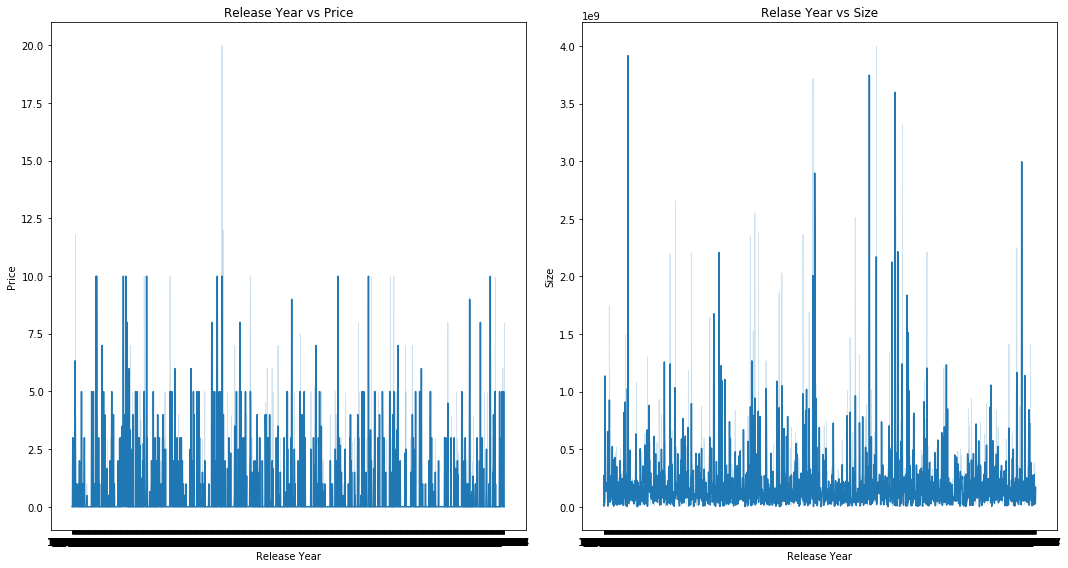

In [12]:
df['Release Year'] = df['Original Release Date']

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.lineplot(x='Release Year', y='Price', data=df, palette='Wistia', ax=ax[0])
ax[0].set_title('Release Year vs Price')

sns.lineplot(x='Release Year', y='Size', data=df, palette='Wistia', ax=ax[1])
ax[1].set_title('Relase Year vs Size')
plt.tight_layout()
plt.show()

We Can Observe that prices for the games decreased tremendously but Size of the game increased which is obvious as most of us have access internet and we can easily download a 1-2GB game

### Are Paid Games Really Good ?

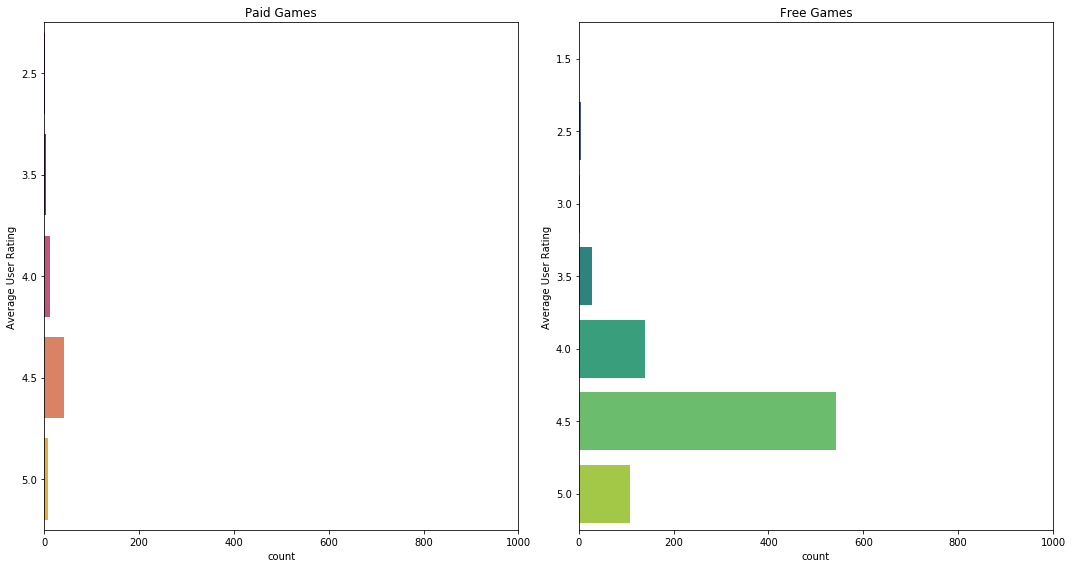

In [15]:
paid = df[df['Price']>0]
free = df[df['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='plasma')
ax[0].set_title('Paid Games')
ax[0].set_xlim([0, 1000])

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='viridis')
ax[1].set_title('Free Games')
ax[1].set_xlim([0,1000])
plt.tight_layout();
plt.show()

1. As expected there are less number of paid games than free games
2. But Still we cannot see any difference in user ratings of both the categories
3. Most of the Games are rated quite good around 4.0-5.0
4. It doesn't seem like price has an impact on the ratings as both free and paid games have almost same ratings

In [16]:
py.iplot([pie_plot(df['Age Rating'].value_counts(), ['cyan', 'gold', 'red'], 'Age Rating')])

1. Most of the Games are 4+ and 9+
2. So Definetly Game Developers are looking for a wide range of audience

Most Expensive Game ?

In [17]:
price = df.sort_values(by='Price', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'Icon URL']].head(10)
price.iloc[:, 0:-1]

,Name,Price,Average User Rating,Size
673,Ticket to Ride,6.99,4.0,6.686689e+08
12016,Kingdom Rush Vengeance,4.99,5.0,7.511470e+08
2816,Hitman GO,4.99,4.5,1.106129e+09
8668,Bloons TD 6,4.99,5.0,1.638984e+08
10872,911 Operator,4.99,4.5,2.289183e+08
1275,Le Havre (The Harbor),4.99,4.5,2.028534e+08
644,Forbidden Island,4.99,4.5,1.412096e+08
1386,7 Wonders,4.99,4.0,5.215252e+08
1399,Warlords Classic Strategy,4.99,4.5,2.366976e+07
9992,Eight-Minute Empire,4.99,4.5,2.666076e+08


Most Reviewed/Popular Game ?

In [18]:
review = df.sort_values(by='User Rating Count', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'User Rating Count', 'Icon URL']].head(10)
review.iloc[:, 0:-1]

,Name,Price,Average User Rating,Size,User Rating Count
1378,Clash of Clans,0.0,4.5,1.612196e+08,3032734.0
7187,Clash Royale,0.0,4.5,1.451080e+08,1277095.0
13414,PUBG MOBILE,0.0,4.5,2.384082e+09,711409.0
1921,Plants vs. Zombies\u2122 2,0.0,4.5,1.207634e+08,469562.0
8139,Pok\xe9mon GO,0.0,3.5,2.815212e+08,439776.0
2410,Boom Beach,0.0,4.5,2.027858e+08,400787.0
12473,"Cash, Inc. Fame & Fortune Game",0.0,5.0,2.459576e+08,374772.0
8632,Idle Miner Tycoon: Cash Empire,0.0,4.5,4.439747e+08,283035.0
3550,Star Wars\u2122: Commander,0.0,4.5,1.230838e+08,259030.0
6144,Agar.io,0.0,4.5,8.394854e+07,257852.0


1. Clash Of Clans
2. Clash Royale
3. PUBG Mobile

Are the Most Reviewed Games and We can also say Popular Games on App Store

Best Overall Game ?

In [19]:
best = df.sort_values(by=['Average User Rating', 'User Rating Count'], ascending=False)[['Name', 'Average User Rating', 'User Rating Count', 'Size', 
                                                                                         'Price', 'Icon URL']].head(10)
best.iloc[:, 0:-1]

,Name,Average User Rating,User Rating Count,Size,Price
12473,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,245957632.0,0.00
6089,"Egg, Inc.",5.0,174591.0,74891264.0,0.00
14155,AFK Arena,5.0,156766.0,225711104.0,0.00
8388,South Park: Phone Destroyer\u2122,5.0,156044.0,130186240.0,0.00
13261,From Zero to Hero: Cityman,5.0,146729.0,296638464.0,0.00
15266,Sushi Bar Idle,5.0,123606.0,257325056.0,0.00
10418,Fire Emblem Heroes,5.0,120283.0,175634432.0,0.00
1649,Bloons TD 5,5.0,97776.0,133326848.0,2.99
16434,Idle Roller Coaster,5.0,88855.0,234342400.0,0.00
11722,Mafia City: War of Underworld,5.0,88542.0,180564992.0,0.00


1. Cash, Inc. Fame & Fortune Game turns out to be best overall game with 5.0 rating and 374772 reviews
2. There are also a lot of other Games with 5.0 rating and healthy number of reviews